# Лаба 5: Определение принадлежности текстов к заданной тематике

In [1]:
import numpy as np

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn

In [2]:
from pymystem3 import Mystem
m = Mystem()

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[A-Za-zА-Яа-яёЁ]+')

In [3]:
#attention - generator
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    for i in tokens:
        if len(i)>2:
            yield m.lemmatize(i)[0]

### Данные из ЛК

In [4]:
#ids of texts you need to classify
ids=[1025, 4, 3078, 522, 3084, 1550, 3090, 3603, 22, 3607, 1560, 1561, 2224, 859, 31, 3626, 3627, 46, 1076, 2101, 3639, 1717, 3647, 3139, 2634, 1635, 1616, 3154, 3667, 783, 88, 1967, 1117, 1211, 607, 2656, 1634, 1123, 2148, 1125, 1638, 1639, 1131, 2579, 3183, 3184, 2676, 1653, 630, 3703, 2682, 2173, 3203, 2692, 645, 646, 2185, 3214, 1685, 623, 2199, 2200, 1690, 1691, 160, 3233, 3235, 3748, 2215, 3240, 176, 3763, 3253, 2230, 695, 3256, 723, 2235, 1215, 3780, 2758, 2760, 2253, 715, 1741, 3279, 2258, 3795, 1748, 2774, 219, 1244, 1759, 3808, 3299, 742, 1257, 1262, 382, 3827, 468, 3317, 3831, 2812, 766, 1281, 3332, 775, 3852, 2891, 3854, 3343, 274, 3349, 1302, 3352, 133, 1308, 800, 290, 1827, 3292, 1829, 1831, 1323, 3886, 3378, 3892, 2869, 3904, 3906, 1347, 2372, 3398, 840, 3913, 2379, 2896, 3411, 857, 3418, 3931, 352, 3426, 357, 358, 1384, 2922, 2411, 3438, 880, 372, 1909, 888, 1344, 3454, 1920, 386, 3223, 903, 322, 1432, 2288, 414, 2374, 1441, 2067, 421, 1961, 943, 1457, 3509, 3715, 2490, 955, 3744, 958, 3007, 3009, 450, 1806, 3526, 967, 2504, 464, 3025, 3538, 1700, 2517, 1500, 3550, 2026, 2029, 2030, 1519, 503, 3065, 1019, 1020, 510]

texts_index = list(zip(range(200), ids))

In [5]:
len(ids), len(texts_index)

(200, 200)

### Данные тексты

In [6]:
texts = []
for i in range(1,21):
    #f = codecs.open('/data/lab05data/data/base_'+str(i)+'.txt', 'r', 'utf-8')
    f = open('/data/share/lab05data/base_'+str(i)+'.txt', 'r', encoding='utf-8')
    text = f.readlines()
    texts.append(BeautifulSoup(text[0], "lxml").text.lower())
len(texts)

20

In [7]:
for i in ids:
    #f = codecs.open('/data/lab05data/data/test_'+str(i)+'.txt', 'r', 'utf-8')
    f = open('/data/share/lab05data/test_'+str(i)+'.txt', 'r', encoding='utf-8')
    text = f.readlines()
    texts.append(BeautifulSoup(text[0], "lxml").text.lower())
len(texts)

220

In [8]:
print("\n".join(texts[:5]))

ищем прекрасного программиста 1с в дружный отдел сотрудников сферы it с неутомительным режимом работы. у нас есть 1с 8.2, 8.3, бухгалтерия строительной организации, жкх, зуп + самописные. что надо делать: - доработать существующие конфигурации,- разработать новые конфигураций,- отчеты, базы данных...- осуществлять поддержку наших продвинутых пользователей режим работы с 10 до 18 по вторникам и пятницам (строго!).  
предлагаем уникальную возможность присоединиться к команде, разрабатывающей и выпускающей следующее поколение корпоративных антивирусных продуктов. вам будет отведена важная роль в разработке как основного продукта так и смежных инфраструктурных проектов и кастомизиций.   чем придется заниматься:   участие в разработке основной линейки антивирусных продуктов лаборатории касперского   работа в ключевой команде опытных разработчиков лк     что нужно знать и уметь:   отличное знание c# и .net framework.   отличное знание c++ и опыт практического использования (win32).   пониман

### Попробуем собственный токенайзер

In [9]:
from pymystem3 import Mystem
m = Mystem()

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[A-Za-zА-Яа-яёЁ]+')

In [10]:
#attention - generator
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    for i in tokens:
        if len(i)>2:
            yield m.lemmatize(i)[0]

In [11]:
stop_words = ["еще", "него", "сказать", "а", "ж", "нее", "со", "без", "же", "ней", "совсем", "более", "жизнь", 
              "нельзя", "так", "больше", "за", "нет", "такой", "будет", "зачем", "ни", "там", "будто", "здесь", 
              "нибудь", "тебя", "бы", "и", "никогда", "тем", "был", "из", "ним", "теперь", "была", "из", "за",
              "них", "то", "были", "или", "ничего", "тогда", "было", "им", "но", "того", "быть", "иногда", "ну", 
              "тоже", "в", "их", "о", "только", "вам", "к", "об", "том", "вас", "кажется", "один", "тот", "вдруг",
              "как", "он", "три", "ведь", "какая", "она", "тут", "во", "какой", "они", "ты", "вот", "когда", "опять",
              "у", "впрочем", "конечно", "от", "уж", "все", "которого", "перед", "уже", "всегда", "которые", "по",
              "хорошо", "всего", "кто", "под", "хоть", "всех", "куда", "после", "чего", "всю", "ли", "потом", "человек",
              "вы", "лучше", "потому", "чем", "г", "между", "почти", "через", "где", "меня", "при", "что", "говорил",
              "мне", "про", "чтоб", "да", "много", "раз", "чтобы", "даже", "может", "разве", "чуть", "два", "можно",
              "с", "эти", "для", "мой", "сам", "этого", "до", "моя", "свое", "этой", "другой", "мы", "свою", "этом",
              "его", "на", "себе", "этот", "ее", "над", "себя", "эту", "ей", "надо", "сегодня", "я", "ему", "наконец",
              "сейчас", "если", "нас", "сказал", "есть", "не", "сказала"]

### TFIDF для всех тесктов

In [12]:
tfidf_vec = TfidfVectorizer(norm=None, 
                            smooth_idf=False, 
                            token_pattern='[A-Za-zА-Яа-яёЁ]+', 
                            stop_words=stop_words)

m_tfidf = tfidf_vec.fit_transform(texts)
matrix_tfidf = m_tfidf.toarray()

In [13]:
matrix_tfidf.shape

(220, 7217)

In [14]:
matrix_tfidf

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [18.40747231,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [15]:
from sklearn.metrics.pairwise import pairwise_distances

In [16]:
%%time
d = pairwise_distances(matrix_tfidf, metric='cosine')

CPU times: user 2.14 s, sys: 280 ms, total: 2.42 s
Wall time: 126 ms


In [17]:
d.shape

(220, 220)

"Так как текстов заданной тематики несколько, результирующую метрику на неизвестный текст можно получить путем сложения косинусной меры этого текста со всеми эталонными текстами. При этом сумма косинусных мер может оказаться больше единицы."

In [18]:
d20 = 1 - abs(d[:20][:])

In [19]:
d20.shape

(20, 220)

In [20]:
y=list(d20.sum(axis=0)[20:])

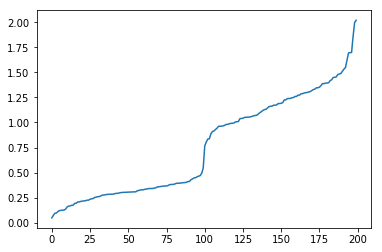

In [21]:
plt.plot(sorted(y))

In [22]:
#С токенайзером

In [22]:
tfidf_vec = TfidfVectorizer(norm=None, 
                            smooth_idf=False, 
                            tokenizer=tokenize, 
                            stop_words=stop_words)
matrix_tfidf = tfidf_vec.fit_transform(texts).toarray()


In [23]:
%%time
d = pairwise_distances(matrix_tfidf, metric='cosine')

CPU times: user 876 ms, sys: 180 ms, total: 1.06 s
Wall time: 43.4 ms


In [24]:
d20 = 1 - abs(d[:20][:])
y=list(d20.sum(axis=0)[20:])

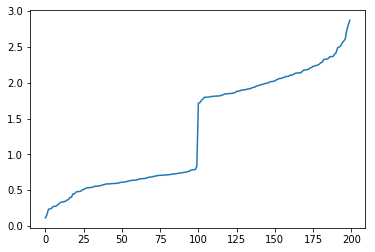

In [25]:
plt.plot(sorted(y))

In [26]:
print(len(y))
print(sum(y))
print(matrix_tfidf.shape)

200
265.1721777748663
(220, 4266)


In [27]:
average = sum(y)/200
print(average)

1.3258608888743317


In [28]:
result = {
    'defined': [],
    'other': []
}

for i in y:
    if i > average:
        result['defined'].append(texts_index[y.index(i)][1])
    else:
        result['other'].append(texts_index[y.index(i)][1])
print(result)

{'defined': [4, 3090, 3603, 22, 3607, 31, 3626, 3627, 1076, 3139, 3154, 3667, 783, 88, 1211, 607, 2656, 1123, 2148, 1125, 1639, 1653, 2173, 3203, 2692, 645, 646, 2185, 3214, 2199, 1690, 3748, 3240, 176, 3763, 3253, 2230, 3256, 2235, 1215, 2758, 715, 1741, 2258, 1748, 219, 1244, 1759, 3808, 742, 1262, 382, 468, 3317, 1281, 3332, 775, 3854, 3343, 3349, 800, 3886, 3892, 2869, 3904, 1347, 840, 2379, 2896, 3411, 857, 3418, 3426, 357, 358, 2411, 3438, 372, 3454, 1920, 3223, 1432, 2288, 421, 943, 1457, 2490, 955, 958, 3007, 450, 2504, 464, 1700, 2517, 2026, 2030, 1519, 3065, 510], 'other': [1025, 3078, 522, 3084, 1550, 1560, 1561, 2224, 859, 46, 2101, 3639, 1717, 3647, 2634, 1635, 1616, 1967, 1117, 1634, 1638, 1131, 2579, 3183, 3184, 2676, 630, 3703, 2682, 1685, 623, 2200, 1691, 160, 3233, 3235, 2215, 695, 723, 3780, 2760, 2253, 3279, 3795, 2774, 3299, 1257, 3827, 3831, 2812, 766, 3852, 2891, 274, 1302, 3352, 133, 1308, 290, 1827, 3292, 1829, 1831, 1323, 3378, 3906, 2372, 3398, 3913, 3931, 35

"Выходной файл должен быть расположен в корне вашей директории в файле lab05.json. Чекер будет брать файл именно оттуда."

In [29]:
import json
with open("lab05.json", "w") as outfile:
    json.dump(result, outfile)

Лабораторная будет считаться пройденной, если метрики:

len(TrueDefined.intersection(YourDefined))/len(YourDefined)

len(TrueDefined.intersection(YourDefined))/len(TrueDefined)

будут больше 0.9.

```
time: 2019-20-04 11:56
result is correct: True
len(TrueDefined.intersection(YourDefined))/len(TrueDefined): 1.0
len(TrueDefined.intersection(YourDefined))/len(YourDefined): 1.0
checker has successfully read all data in file: True
file lab05.json exists in your dir: True
file has size less than 20 000 bytes: True
```